In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte, img_as_float
from IPython.display import Image

In [4]:
# Directory list
# For picture

melanoma_train_src_dir="melanoma/train"
melanoma_test_src_dir="melanoma/test"

In [3]:
# img = io.imread('image-1.jpg')
# io.imshow(img)

In [12]:
# GLCM properties
def contrast_feature(matrix_coocurrence):
	contrast = greycoprops(matrix_coocurrence, 'contrast')
	return contrast

def dissimilarity_feature(matrix_coocurrence):
	dissimilarity = greycoprops(matrix_coocurrence, 'dissimilarity')	
	return dissimilarity

def homogeneity_feature(matrix_coocurrence):
	homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
	return homogeneity

def energy_feature(matrix_coocurrence):
	energy = greycoprops(matrix_coocurrence, 'energy')
	return energy

def correlation_feature(matrix_coocurrence):
	correlation = greycoprops(matrix_coocurrence, 'correlation')
	return correlation

def asm_feature(matrix_coocurrence):
	asm = greycoprops(matrix_coocurrence, 'ASM')
	return asm

In [109]:
columns = ['glcm_contrast_1', 'glcm_contrast_2', 'glcm_contrast_3', 'glcm_contrast_4', 'glcm_dissimilarity_1', 'glcm_dissimilarity_2', 'glcm_dissimilarity_3', 'glcm_dissimilarity_4', 'glcm_homogenity_1', 'glcm_homogenity_2', 'glcm_homogenity_3', 'glcm_homogenity_4']
glcm = pd.DataFrame()
glcm_contrast = []
glcm_dissimilarity = []
glcm_homogenity = []
glcm_energy = []
glcm_correlation = []
glcm_asm = []

for filename in os.listdir(melanoma_train_src_dir):
    if filename.endswith(".jpg"):
        tempfilename = melanoma_train_src_dir+"/"+filename
        # print(tempfilename)
        img = io.imread(tempfilename)
        gray = color.rgb2gray(img)
        image = img_as_ubyte(gray)
        bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
        inds = np.digitize(image, bins)
        max_value = inds.max()+1
        matrix_coocurrence = greycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, normed=False, symmetric=False)
        
        # glcm_contrast = pd.DataFrame(contrast_feature(matrix_coocurrence))
        # glcm_dissimilarity = pd.DataFrame(dissimilarity_feature(matrix_coocurrence))
        # glcm_homogenity = pd.DataFrame(homogeneity_feature(matrix_coocurrence))
        # glcm_energy = pd.DataFrame(energy_feature(matrix_coocurrence))
        # glcm_correlation = pd.DataFrame(correlation_feature(matrix_coocurrence))
        # glcm_asm = pd.DataFrame(asm_feature(matrix_coocurrence))
        
        contrast = np.array(contrast_feature(matrix_coocurrence))        
        dissimilarity = np.array(dissimilarity_feature(matrix_coocurrence))
        homogenity = np.array(homogeneity_feature(matrix_coocurrence))
        energy = np.array(energy_feature(matrix_coocurrence))
        correlation = np.array(correlation_feature(matrix_coocurrence))
        asm = np.array(asm_feature(matrix_coocurrence))        
        
        #glcm = pd.concat([glcm_contrast, glcm_dissimilarity, glcm_homogenity, glcm_energy, glcm_correlation, glcm_asm])
        
        # print(contrast_feature(matrix_coocurrence))
        # print(dissimilarity_feature(matrix_coocurrence))
        # print(homogeneity_feature(matrix_coocurrence))
        # print(energy_feature(matrix_coocurrence))
        # print(correlation_feature(matrix_coocurrence))
        # print(asm_feature(matrix_coocurrence))
        
        glcm_contrast.append(contrast)
        glcm_dissimilarity.append(dissimilarity)
        glcm_homogenity.append(homogenity)
        glcm_energy.append(energy)
        glcm_correlation.append(correlation)
        glcm_asm.append(asm)

In [122]:
# create dataframe for every GLCM features
# create GLCM dataframe that consist all the features

glcm_contrast_df = pd.DataFrame(np.concatenate(glcm_contrast))
glcm_dissimilarity_df = pd.DataFrame(np.concatenate(glcm_dissimilarity))
glcm_homogenity_df = pd.DataFrame(np.concatenate(glcm_homogenity))
glcm_energy_df = pd.DataFrame(np.concatenate(glcm_energy))
glcm_correlation_df = pd.DataFrame(np.concatenate(glcm_correlation))
glcm_asm_df = pd.DataFrame(np.concatenate(glcm_asm))

glcm = pd.concat([glcm_contrast_df, glcm_dissimilarity_df, glcm_homogenity_df, glcm_energy_df, glcm_correlation_df, glcm_asm_df], axis = 1)

In [123]:
glcm

,0,1,2,3,0,1,2,3,0,1,...,2,3,0,1,2,3,0,1,2,3
0,0.253222,0.306026,0.273556,0.364044,0.235199,0.279278,0.251292,0.320229,0.884056,0.862800,...,0.358059,0.337537,0.968572,0.961972,0.966084,0.954763,0.131995,0.122136,0.128206,0.113931
1,0.249649,0.329915,0.248237,0.330443,0.240605,0.300326,0.235490,0.305940,0.880534,0.852329,...,0.289966,0.272754,0.975449,0.967554,0.975580,0.967500,0.083360,0.075195,0.084080,0.074395
2,0.228510,0.319248,0.242316,0.304784,0.194840,0.251228,0.199770,0.244996,0.905465,0.879846,...,0.312985,0.301090,0.985808,0.980172,0.984945,0.981071,0.098550,0.089950,0.097960,0.090655
3,0.094591,0.125331,0.101763,0.126614,0.093760,0.120066,0.097398,0.120442,0.953203,0.940491,...,0.684215,0.676310,0.969814,0.960070,0.967551,0.959661,0.468602,0.455415,0.468150,0.457395
4,0.198490,0.398143,0.296919,0.309949,0.173819,0.246376,0.200772,0.232277,0.915306,0.886845,...,0.307918,0.298887,0.983841,0.967611,0.975823,0.974784,0.097287,0.088553,0.094813,0.089334
5,0.184719,0.238553,0.185286,0.238188,0.164337,0.206614,0.160230,0.196508,0.919796,0.899703,...,0.533668,0.523330,0.977191,0.970589,0.977124,0.970634,0.283279,0.267628,0.284801,0.273874
6,0.144085,0.211790,0.155913,0.181658,0.140048,0.195578,0.149269,0.178646,0.930347,0.903380,...,0.385612,0.375390,0.981000,0.972100,0.979438,0.976071,0.151312,0.137548,0.148697,0.140918
7,0.232628,0.335002,0.297160,0.459240,0.195871,0.250637,0.222142,0.295894,0.905604,0.882298,...,0.365560,0.348196,0.955047,0.935223,0.942569,0.911194,0.136065,0.124979,0.133634,0.121241
8,0.131779,0.173467,0.148909,0.179200,0.128625,0.165145,0.142108,0.168083,0.936001,0.918243,...,0.488807,0.480557,0.968652,0.958772,0.964573,0.957410,0.243989,0.231612,0.238933,0.230935
9,0.477566,0.610992,0.449811,0.688471,0.290173,0.347041,0.278927,0.373083,0.870178,0.847019,...,0.309541,0.292576,0.980669,0.975290,0.981798,0.972158,0.094160,0.087003,0.095816,0.085601


In [50]:
df = pd.DataFrame(glcm)
df.to_csv('out.csv', index=False)

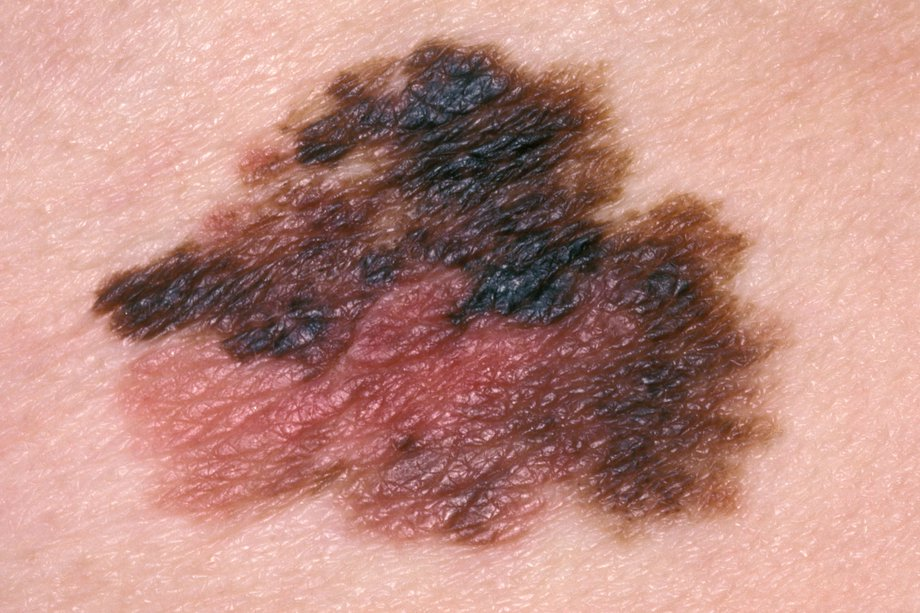

In [3]:
img = Image(filename='image-1.jpg')
display(img)

In [5]:
img = io.imread('image-1.jpg')
gray = color.rgb2gray(img)
image = img_as_ubyte(gray)

C:\Users\ravee\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


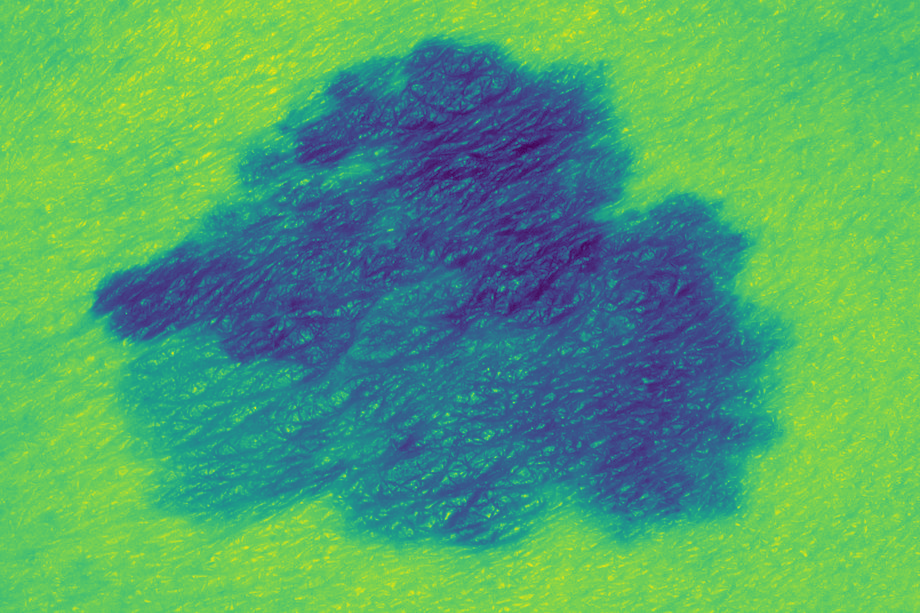

In [6]:
plt.imsave('gray.png', gray)
gray = Image(filename='gray.png')
display(gray)

In [7]:
bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
inds = np.digitize(image, bins)

In [8]:
max_value = inds.max()+1
matrix_coocurrence = greycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, normed=False, symmetric=False)

In [31]:
print(contrast_feature(matrix_coocurrence))
print(dissimilarity_feature(matrix_coocurrence))
print(homogeneity_feature(matrix_coocurrence))
print(energy_feature(matrix_coocurrence))
print(correlation_feature(matrix_coocurrence))
print(asm_feature(matrix_coocurrence))

[[0.40617239 0.75841886 0.48426577 0.53613796]]
[[0.33845569 0.52185524 0.39036836 0.41306798]]
[[0.83745822 0.7618836  0.81409441 0.80544941]]
[[0.31430639 0.28384585 0.30388285 0.29930312]]
[[0.9830178  0.96830497 0.9797527  0.97759429]]
[[0.09878851 0.08056847 0.09234478 0.08958236]]


In [32]:
contrast = np.array(contrast_feature(matrix_coocurrence))
dissimilarity = np.array(dissimilarity_feature(matrix_coocurrence))
homogenity = np.array(homogeneity_feature(matrix_coocurrence))
energy = np.array(energy_feature(matrix_coocurrence))
correlation = np.array(correlation_feature(matrix_coocurrence))
asm = np.array(asm_feature(matrix_coocurrence))

In [33]:
contrast.dtype

dtype('float64')

In [34]:
out = np.append(contrast, dissimilarity, axis=1)
out = np

In [16]:
out

NameError: name 'out' is not defined

In [29]:
df = pd.DataFrame(out)
df.to_csv('out.csv', index=False)